In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import numpy as np
import json
%matplotlib inline

In [2]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty.csv")
df = df.drop("Unnamed: 0", 1)
df = df.drop("id_szkoly", 1)

/usr/local/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,8,11,14,17,20,23,26,29,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
df.head()

,plec,rocznik,dysleksja,biologia_laureat,biologia_podstawowa,biologia_rozszerzona,chemia_laureat,chemia_podstawowa,chemia_rozszerzona,fizyka_laureat,...,j_angielski_rozszerzona,j_polski_laureat,j_polski_podstawowa,j_polski_rozszerzona,matematyka_laureat,matematyka_podstawowa,matematyka_rozszerzona,WOS_laureat,WOS_podstawowa,WOS_rozszerzona
0,k,1995,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25,NaN,NaN,4,NaN,NaN,NaN,NaN
1,k,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,6,NaN,NaN,NaN,NaN
2,k,1995,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15,NaN,NaN,3,NaN,NaN,NaN,NaN
3,k,1994,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,4,NaN,NaN,NaN,NaN
4,k,1995,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39,NaN,NaN,13,NaN,NaN,NaN,NaN


In [4]:
df.count()

plec                       301736
rocznik                    297637
dysleksja                  297863
biologia_laureat               84
biologia_podstawowa         26731
biologia_rozszerzona        28369
chemia_laureat                 74
chemia_podstawowa            8394
chemia_rozszerzona          22365
fizyka_laureat                 45
fizyka_podstawowa           12138
fizyka_rozszerzona          12421
geografia_laureat              69
geografia_podstawowa        34759
geografia_rozszerzona       25074
historia_laureat              105
historia_podstawowa          8369
historia_rozszerzona         7651
informatyka_laureat            61
informatyka_podstawowa       2061
informatyka_rozszerzona      2243
j_angielski_laureat            37
j_angielski_podstawowa     265668
j_angielski_rozszerzona     79661
j_polski_laureat              183
j_polski_podstawowa        301805
j_polski_rozszerzona        30056
matematyka_laureat             74
matematyka_podstawowa      301545
matematyka_roz

In [5]:
np.sqrt(df.count())

plec                       549.305015
rocznik                    545.561179
dysleksja                  545.768266
biologia_laureat             9.165151
biologia_podstawowa        163.496177
biologia_rozszerzona       168.430995
chemia_laureat               8.602325
chemia_podstawowa           91.618775
chemia_rozszerzona         149.549323
fizyka_laureat               6.708204
fizyka_podstawowa          110.172592
fizyka_rozszerzona         111.449540
geografia_laureat            8.306624
geografia_podstawowa       186.437657
geografia_rozszerzona      158.347719
historia_laureat            10.246951
historia_podstawowa         91.482239
historia_rozszerzona        87.469995
informatyka_laureat          7.810250
informatyka_podstawowa      45.398238
informatyka_rozszerzona     47.360321
j_angielski_laureat          6.082763
j_angielski_podstawowa     515.429918
j_angielski_rozszerzona    282.242803
j_polski_laureat            13.527749
j_polski_podstawowa        549.367818
j_polski_roz

In [7]:
przedmioty = [col for col in df if col.endswith("podstawowa") or col.endswith("rozszerzona")]

In [8]:
uczestnictwo = df.loc[:, przedmioty]
uczestnictwo = pd.notnull(uczestnictwo).values.astype(int)

In [9]:
uczestnictwo.shape

(304384, 20)

In [10]:
koincydencje = np.dot(uczestnictwo.transpose(), uczestnictwo)

In [11]:
koincydencje.shape

(20, 20)

In [12]:
df_k = pd.DataFrame(koincydencje, index=przedmioty, columns=przedmioty)

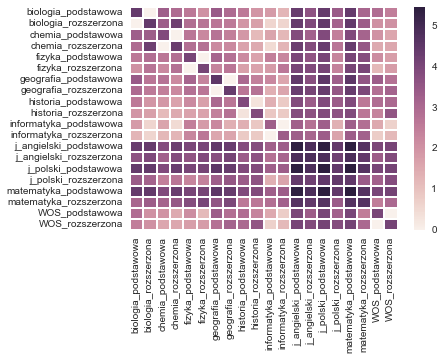

In [13]:
sns.heatmap(np.log10(df_k + 1))

In [14]:
df_p = df_k/df_k.max().max()

In [15]:
df_wzajemna = df_p.copy()

In [16]:
for col in df_wzajemna.columns:
    for row in df_wzajemna.columns:
        if df_p.loc[row, col] == 0:
            df_wzajemna.loc[row, col] = -20
        else:
            df_wzajemna.loc[row, col] = np.log2(df_p.loc[row, col] / (df_p.loc[row, row] * df_p.loc[col, col]))

In [17]:
nodes = []
for col in df_wzajemna.columns:
    nodes.append({"name": col,
                  "count": float(df_k.loc[col, col])})

links = []
for i, row in enumerate(df_wzajemna.columns):
    for j, col in enumerate(df_wzajemna.columns):
        if i < j:
            links.append({"source": int(i),
                          "target": int(j),
                          "count": float(df_k.loc[row, col]),
                          "oe": float(df_p.loc[row, col] / (df_p.loc[row, row] * df_p.loc[col, col]))})

In [18]:
json.dump({"nodes": nodes, "links": links}, open("../dane/przetworzone/wspolwystepowanie.json", "w"), indent=2)

In [ ]:
sns.heatmap(df_wzajemna)

In [ ]:
sns.heatmap(df_wzajemna.applymap(lambda x: x if x > 0 else 0))

In [ ]:
sns.clustermap(df_wzajemna.applymap(lambda x: x if x > 0 else 0))